In [1]:
import matplotlib.pyplot as plt
import planetmapper
from io_funcs import DefinitelyRealIo, get_arcsec_extents
import scienceplots

plt.style.use(['science', 'bright', 'no-latex'])

In [2]:
from volcanoes import volcanoes

def io_on_that_day(
        n_volc = 0,
        body='io',
        date='2022-08-01T16:52:00.000',
        observer='jwst',
        **kwargs
        ):
    
    """
    Use this with body.plot_wireframe_angular to plot the body on a map.
    """
    body = planetmapper.Body(body, date, observer=observer, **kwargs)

    if n_volc == 'all':
        n_volc = len(volcanoes)
    body.coordinates_of_interest_lonlat = volcanoes[:n_volc]

    return body

In [3]:
sim_io = DefinitelyRealIo(night_day_ratio=1, volc_contrast=1e-2, seed=2, n_volcanoes=3)
body = io_on_that_day(n_volc=10)

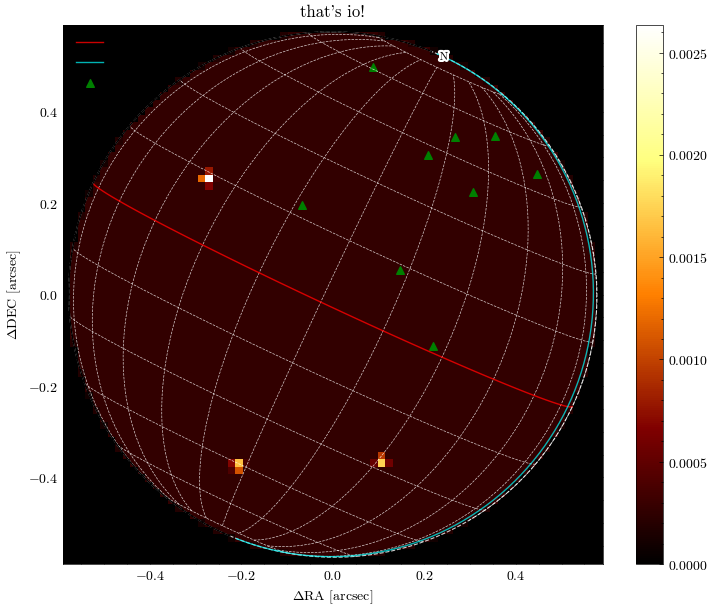

In [4]:
fig, ax = plt.subplots(figsize=(8.7, 7))

body.plot_wireframe_angular(
    ax,
    add_title=False,
    label_poles=True,
    indicate_equator=True,
    indicate_prime_meridian=False,
    grid_interval=15,
    grid_lat_limit=75,
    formatting={
        'limb': {'linestyle': '--', 'linewidth': 0.8, 'alpha': 0.8, 'color': 'white'},
        'grid': {'linestyle': '--', 'linewidth': 0.5, 'alpha': 0.8, 'color': 'white'},
        'equator': {'linewidth': 1, 'color': 'r', 'label': 'equator'},
        'terminator': {'linewidth': 1, 'linestyle': '-', 'color': 'aqua', 'alpha': 0.7, 'label': 'terminator'},
        'coordinate_of_interest_lonlat': {'color': 'g', 'marker': '^', 's': 30, 'label': 'volcano'},
        # 'limb_illuminated': {'color': 'b'},
    },
    )


ax.axis('equal')
ax.set(
    title='that\'s io!',
    xlabel=r'$\Delta$RA [arcsec]',
    ylabel=r'$\Delta$DEC [arcsec]',
    # xlim=[-1, 1],
    # ylim=[-1, 1],
)

im = ax.imshow(
    sim_io.data,
    alpha=1, 
    extent=get_arcsec_extents(sim_io.pixel_scale / sim_io.oversample, sim_io.data.shape),
    cmap="afmhot",
    )
fig.colorbar(im)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')
plt.show()